# GSD: Assessing ambiguous nts in 1011 collection genomes (TINY SET)

**DEVELOPMENT WITH JUST TWO OF THE 1011 genomes collection (TINY SET)**

Checks a collection of sequenced cerevisiae genomes from [Peter et al 2018](https://www.ncbi.nlm.nih.gov/pubmed/29643504) for ambiguous/gap-representing residues. Compares them to a roughly dozen genomes sequenced by the PacBio method from [Yue et al., 2017](https://www.ncbi.nlm.nih.gov/pubmed/28416820) as well as the  SGD reference sequence from [here](https://downloads.yeastgenome.org/sequence/S288C_reference/chromosomes/fasta/).

References for sequence data:  
- [Genome evolution across 1,011 Saccharomyces cerevisiae isolates. Peter J, De Chiara M, Friedrich A, Yue JX, Pflieger D, Bergström A, Sigwalt A, Barre B, Freel K, Llored A, Cruaud C, Labadie K, Aury JM, Istace B, Lebrigand K, Barbry P, Engelen S, Lemainque A, Wincker P, Liti G, Schacherer J. Nature. 2018 Apr;556(7701):339-344. doi: 10.1038/s41586-018-0030-5. Epub 2018 Apr 11. PMID: 29643504](https://www.ncbi.nlm.nih.gov/pubmed/29643504)

- [Contrasting evolutionary genome dynamics between domesticated and wild yeasts.
Yue JX, Li J, Aigrain L, Hallin J, Persson K, Oliver K, Bergström A, Coupland P, Warringer J, Lagomarsino MC, Fischer G, Durbin R, Liti G. Nat Genet. 2017 Jun;49(6):913-924. doi: 10.1038/ng.3847. Epub 2017 Apr 17. PMID: 28416820](https://www.ncbi.nlm.nih.gov/pubmed/28416820)


- [Life with 6000 genes. Goffeau A, Barrell BG, Bussey H, Davis RW, Dujon B, Feldmann H, Galibert F, Hoheisel JD, Jacq C, Johnston M, Louis EJ, Mewes HW, Murakami Y, Philippsen P, Tettelin H, Oliver SG. Science. 1996 Oct 25;274(5287):546, 563-7. PMID: 8849441](https://www.ncbi.nlm.nih.gov/pubmed/8849441)
  
  
-----

## Preparation

Get scripts and sequence data necessary.

**Before doing `Run All`, make sure the fifth cell is set to get the desired set from the 1011 genomes collection.**


In [1]:
!pip install pyfaidx

  Running setup.py bdist_wheel for pyfaidx ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/54/a2/b4/e242e58d23b2808e191b214067880faa46cd2341f363886e0b
Successfully built pyfaidx


Get the genomes data by running these commands.

In [2]:
import pandas as pd
# Prepare for getting PacBio (Yue et al 2017 sequences)
#make a list of the strain designations
yue_et_al_strains = ["S288C","DBVPG6044","DBVPG6765","SK1","Y12",
                     "YPS128","UWOPS034614","CBS432","N44","YPS138",
                     "UFRJ50816","UWOPS919171"]
# Get & unpack the genome sequences from strains 
for s in yue_et_al_strains:
    !curl -LO http://yjx1217.github.io/Yeast_PacBio_2016/data/Nuclear_Genome/{s}.genome.fa.gz
    !curl -OL http://yjx1217.github.io/Yeast_PacBio_2016/data/Mitochondrial_Genome/{s}.mt.genome.fa.gz
    !gunzip -f {s}.genome.fa.gz
    !gunzip -f {s}.mt.genome.fa.gz
    # add the mitochondrial genome content onto the nuclear
    !cat {s}.genome.fa {s}.mt.genome.fa > temp.genome.fa
    !mv temp.genome.fa {s}.genome.fa
!rm *.mt.genome.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0   2342      0 --:--:-- --:--:-- --:--:--  2311
100 3687k  100 3687k    0     0  13.2M      0 --:--:-- --:--:-- --:--:-- 13.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0   3708      0 --:--:-- --:--:-- --:--:--  3708
100 22109  100 22109    0     0   142k      0 --:--:-- --:--:-- --:--:--  142k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0   2656      0 --:--:-- --:--:-- --:--:--  2656
100 3387k  100 3387k    0     0  12.2M      0 --:--:-- --:--:-- --:--:-- 22.8M
  % Total    % Received % Xferd  Average Speed   Tim

In [3]:
# add identifiers to each `chr` so results for each strain clear later
chromosome_id_prefix = "chr"
def add_strain_id_to_description_line(file,strain_id):
    '''
    Takes a file and edits every description line to add 
    strain_id after the caret.
    
    Saves the fixed file
    '''
    import sys
    output_file_name = "temp.txt"
    # prepare output file for saving so it will be open and ready
    with open(output_file_name, 'w') as output_file:

        # read in the input file
        with open(file, 'r') as input_handler:
            # prepare to give feeback later or allow skipping to certain start
            lines_processed = 0

            for line in input_handler:
                lines_processed += 1
                if line.startswith(">"):
                    rest_o_line = line.split(">")
                    new_line = ">"+strain_id + rest_o_line[1]
                else:
                    new_line = line
                
                # Send text to output
                output_file.write(new_line)

    
    # replace the original file with edited
    !mv temp.txt {file}
    # Feedback
    sys.stderr.write("\n{} chromosome identifiers tagged.".format(file))

for s in yue_et_al_strains:
    add_strain_id_to_description_line(s+".genome.fa",s)


S288C.genome.fa chromosome identifiers tagged.
DBVPG6044.genome.fa chromosome identifiers tagged.
DBVPG6765.genome.fa chromosome identifiers tagged.
SK1.genome.fa chromosome identifiers tagged.
Y12.genome.fa chromosome identifiers tagged.
YPS128.genome.fa chromosome identifiers tagged.
UWOPS034614.genome.fa chromosome identifiers tagged.
CBS432.genome.fa chromosome identifiers tagged.
N44.genome.fa chromosome identifiers tagged.
YPS138.genome.fa chromosome identifiers tagged.
UFRJ50816.genome.fa chromosome identifiers tagged.
UWOPS919171.genome.fa chromosome identifiers tagged.

In [4]:
# Get SGD reference sequence that includes nuclear and mitochondrial sequence as one file,
# among others. I'll use file name for the reference genome worked out 
# in `GSD Assessing_ambiguous_nts_in_nuclear_PB_genomes.ipynb`, so more of the
# previously worked out code will work.
!curl -OL https://downloads.yeastgenome.org/sequence/S288C_reference/genome_releases/S288C_reference_genome_Current_Release.tgz
!tar -xzf S288C_reference_genome_Current_Release.tgz
!rm S288C_reference_genome_Current_Release.tgz
!mv S288C_reference_genome_R64-2-1_20150113/S288C_reference_sequence_R64-2-1_20150113.fsa ./SGD_REF.genome.fa
!rm -rf S288C_reference_genome_R64-2-1_20150113

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.8M  100 16.8M    0     0  14.0M      0  0:00:01  0:00:01 --:--:-- 14.0M


**Now to get the entire collection or a subset of the 1011 genomes, the next cell will need to be edited.** I'll probably leave it with a small set for typical running purposes. However, to make it run fast, try the 'super-tiny' set with just two.

In [4]:
# Method to get ALL the genomes. TAKES A WHILE!
#!curl -O http://1002genomes.u-strasbg.fr/files/1011Assemblies.tar.gz
#!tar xzf 1011Assemblies.tar.gz

# Small development set
#!curl -OL https://www.dropbox.com/s/f42tiygq9tr1545/medium_setGENOMES_ASSEMBLED.tar.gz
#!tar xzf medium_setGENOMES_ASSEMBLED.tar.gz

# Tiny development set
!curl -OL https://www.dropbox.com/s/txufq2jflkgip82/tiny_setGENOMES_ASSEMBLED.tar.gz
!tar xzf tiny_setGENOMES_ASSEMBLED.tar.gz
!mv tiny_setGENOMES_ASSEMBLED GENOMES_ASSEMBLED

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1204    0  1204    0     0    929      0 --:--:--  0:00:01 --:--:--  2384
100 7237k  100 7237k    0     0  3366k      0  0:00:02  0:00:02 --:--:-- 25.9M


Address `CDH.re.fa` if included:  
Before process the list of all of them, fix one that has an file name mismatch with what the description lines have.  
Specifically, the assembly file name is `CDH.re.fa`, but the FASTA-entries inside begin `CDH-3`.  
Simple file name mismatch.  So next cell will change that file name to match.

(I have been adding this particular file into the unpacked 'GENOMES_ASSEMBLED' directory from the 'SMALL' and , sometimes the 'TINY', set via drag and drop from my local computer at this point in order to test the next cell. GIVE IT A MINUTE TO UPLOAD BECAUSE IF YOU RUN THE NEXT CELL TOO SOON, IT WILL ONLY MOVE WHAT IS UPLOADED AND THEN THERE WILL STILL BE A FILE WITH ORIGINAL NAME AS REST UPLOADS.)

In [8]:
import os
import sys
file_with_issues = "CDH.re.fa"
if os.path.isfile("GENOMES_ASSEMBLED/"+file_with_issues):
    sys.stderr.write("\nFile with name non-matching entries ('{}') observed and"
        " fixed.".format(file_with_issues))
    !mv GENOMES_ASSEMBLED/CDH.re.fa GENOMES_ASSEMBLED/CDH_3.re.fa
    #pause and then check if file with original name is there still because
    # it means this was attempted too soon and need to start over.
    import time
    time.sleep(12) #12 seconds 
    if os.path.isfile("GENOMES_ASSEMBLED/"+file_with_issues):
        sys.stderr.write("\n***PROBLEM. TRIED THIS CELL BEFORE FINISHED UPLOADING.\n"
            "DELETE FILES ASSOCIATED AND START ALL OVER AGAIN WITH UPLOAD STEP***.")
else:
     sys.stderr.write("\nFile '{}' not seen and so nothing done"
        ". OKAY??".format(file_with_issues))


File with name non-matching entries ('CDH.re.fa') observed and fixed.

In [9]:
# Make a list of all `genome.fa` files, excluding `genome.fa.nhr` and `genome.fa.nin` and `genome.fansq`
# The excluding was only necessary because I had run some BLAST queries preiminarily in development. Normally, 
# it would just be the `.re.fa` at the outset. (But keeping because removal ability could be useful.)
fn_to_check = "genome.fa" 
genomes = []
import os
import fnmatch
for file in os.listdir('.'):
    if fnmatch.fnmatch(file, '*'+fn_to_check):
        if not file.endswith(".nhr") and not file.endswith(".nin") and not file.endswith(".nsq") :
            genomes.append(file)
for file in os.listdir('GENOMES_ASSEMBLED'):
    if fnmatch.fnmatch(file, '*'+".re.fa"):
        if not file.endswith(".nhr") and not file.endswith(".nin") and not file.endswith(".nsq") :
            genomes.append("GENOMES_ASSEMBLED/"+file)
genomes

['DBVPG6044.genome.fa',
 'DBVPG6765.genome.fa',
 'CBS432.genome.fa',
 'YPS128.genome.fa',
 'UFRJ50816.genome.fa',
 'S288C.genome.fa',
 'SK1.genome.fa',
 'UWOPS034614.genome.fa',
 'UWOPS919171.genome.fa',
 'YPS138.genome.fa',
 'N44.genome.fa',
 'Y12.genome.fa',
 'GENOMES_ASSEMBLED/CEF_4.re.fa',
 'GENOMES_ASSEMBLED/CDH_3.re.fa',
 'GENOMES_ASSEMBLED/AIN_1.re.fa']


Now you are prepared to analyze each genome.

## Assessing the genomes in regards to stretches of N base calls

### Total number of Ns present

In [10]:
from pyfaidx import Fasta
query = "N"
#query = "X"
#query = "A" # CONTROL. should occur!

genomes_with_ambiguous = [] # This to be used for reporting when amount to analyze starts
# to get large
cut_off_for_printing_status_each = 100

for g in genomes:
    chrs = Fasta(g)
    ambiguous = []
    for x in chrs:
        #print(x.name)
        if query in str(x):
            ambiguous.append(x.name)
    if ambiguous:
        genomes_with_ambiguous.append(g)
    #print(ambiguous)
    if len(genomes) < cut_off_for_printing_status_each:
        if not ambiguous:
            print ("No ambiguous nucleotides or gaps in {}.".format(g))
        else:
            print("There are occurences of '{}' in {}.".format(query,g))
if genomes_with_ambiguous and (len(genomes) >= cut_off_for_printing_status_each):
    print("There are occurences of '{}' in {} genomes.".format(query,len(genomes_with_ambiguous)))
    if len(genomes_with_ambiguous) < 250:
        print("The following are the ones with '{}':\n{}.".format(query,genomes_with_ambiguous))
    else:
        print("That is a lot, and so they won't be listed here.\nAnalyses below will reveal more specifics.") 
    
else:
    print ("No ambiguous nucleotides or gaps were found in any the genomes.")

There are occurences of 'N' in DBVPG6044.genome.fa.
There are occurences of 'N' in DBVPG6765.genome.fa.
There are occurences of 'N' in CBS432.genome.fa.
There are occurences of 'N' in YPS128.genome.fa.
There are occurences of 'N' in UFRJ50816.genome.fa.
There are occurences of 'N' in S288C.genome.fa.
There are occurences of 'N' in SK1.genome.fa.
There are occurences of 'N' in UWOPS034614.genome.fa.
There are occurences of 'N' in UWOPS919171.genome.fa.
There are occurences of 'N' in YPS138.genome.fa.
There are occurences of 'N' in N44.genome.fa.
There are occurences of 'N' in Y12.genome.fa.
There are occurences of 'N' in GENOMES_ASSEMBLED/CEF_4.re.fa.
There are occurences of 'N' in GENOMES_ASSEMBLED/CDH_3.re.fa.
There are occurences of 'N' in GENOMES_ASSEMBLED/AIN_1.re.fa.
No ambiguous nucleotides or gaps were found in any the genomes.


Another way to assess, just count all the letters present:

In [18]:
%%time
from pyfaidx import Fasta
import pandas as pd
import collections
nt_counts = {}
for g in genomes:
    if ".genome.fa" in g:
        strain_id = g.split(".genome.fa")[0]
    else:
        strain_id = g.split(".re.fa")[0][18:]
    concatenated_seqs = ""
    chrs = Fasta(g)
    for x in chrs:
        #print(x.name)
        concatenated_seqs += str(x)
    nt_counts[strain_id] = collections.Counter(concatenated_seqs)
nt_count_df = pd.DataFrame.from_dict(nt_counts, orient='index').fillna(0)
nt_count_df["Total_nts"] = nt_count_df.sum(1)
def percent_calc(items):
    '''
    takes a list of two items and calculates percentage of first item
    within total (second item)
    '''
    return items[0]/items[1]
nt_count_df['% N'] = nt_count_df[['N','Total_nts']].apply(percent_calc, axis=1)
nt_count_df = nt_count_df.sort_values(['% N', 'Total_nts'],ascending=[0,0])
nt_count_df_styled = nt_count_df.style.format({'Total_nts':'{:.2E}','% N':'{:.2%}'})

CPU times: user 11.6 s, sys: 428 ms, total: 12 s
Wall time: 12.4 s


In [20]:
nt_count_df.to_csv('PB_n_1011_collection_nt_count_tiny.tsv', sep='\t',index = False)    
nt_count_df.to_pickle("PB_n_1011_collection_nt_count_tiny.pkl")

In [19]:
nt_count_df_styled

,A,G,T,C,N,n,R,Y,W,t,M,K,S,a,g,c,Total_nts,% N
CEF_4,3671264,2267955,3688257,2269761,28238,3,8,8,3,5,2,3,2,4,0,0,1.19E+07,0.24%
CDH_3,4569503,2717773,4562964,2685120,28782,8,1,9,2,76,4,1,1,61,10,25,1.46E+07,0.20%
UWOPS034614,3653129,2250532,3654099,2246408,17357,0,0,0,0,0,0,0,0,0,0,0,1.18E+07,0.15%
N44,3650758,2283907,3646946,2282669,17357,0,0,0,0,0,0,0,0,0,0,0,1.19E+07,0.15%
YPS138,3660837,2278232,3653744,2272948,17357,0,0,0,0,0,0,0,0,0,0,0,1.19E+07,0.15%
DBVPG6765,3681915,2265102,3666626,2263910,17357,0,0,0,0,0,0,0,0,0,0,0,1.19E+07,0.15%
UWOPS919171,3684710,2275952,3677412,2274358,17357,0,0,0,0,0,0,0,0,0,0,0,1.19E+07,0.15%
Y12,3700059,2278293,3691795,2276511,17357,0,0,0,0,0,0,0,0,0,0,0,1.20E+07,0.15%
YPS128,3706321,2285787,3695971,2282517,17357,0,0,0,0,0,0,0,0,0,0,0,1.20E+07,0.14%
DBVPG6044,3723086,2293371,3710750,2294570,17357,0,0,0,0,0,0,0,0,0,0,0,1.20E+07,0.14%


In development, I was suprised at first to see so letters that weren't 'A','G','T','C','N', or lowercase version of those. However, the extras match up with ones identified in [PatMatch documentation](https://www.yeastgenome.org/nph-patmatch)  for pattern syntax for nucleotides. And so I assume they refer to that here. But I was still wondering why are a handfull are lowercase?

As an example, this code below shows displaying an example where the `t` lowercase is seen.

```
jovyan@jupyter-fomightez-2dcl-5fsq-5fdemo-2dbinder-2d24azsfxa:~/notebooks/GSD$ cat GENOMES_ASSEMBLED/CEF_4.re.fa|grep "t"
TTCGTARGAYAGACTCWTTCCCGTGtAAATRTTTGTGACAGYTACGTCTATTTTCTACTM
AYAGACTCWTTCCCGTGtAAATRTTTGTGACAGYTACGTCTATTTTCTACTMKATRTTTA
CCCCGAAAGGAGAAATATAatATATATATATATAATATGCATCCTTATTATAATATTATT
AATTAAATTAAATTAAATTAAATTAAATTAAATTAaattaGATGTTCATTAAATAAAAAT
jovyan@jupyter-fomightez-2dcl-5fsq-5fdemo-2dbinder-2d24azsfxa:~/notebooks/GSD$
```

Why lowercase?
Seeing them in place doesn't spark many ideas as to why there'd be a few cases, except those that seem along with other lowercases letters in a block, such as 'aatta'.  Sometimes lowercase is used for those where identity might be questionable because support limiting or stretch in which it occurs offers low information content.  
The small nature of the block of lowercase though suggests maybe just comes from quality scores from the Illumina reads?

### Examining the number and size of stretches of Ns present

Make a dataframe of the data and also make a summary one with the say, top five(?) number instances, for each. (Idea not yet implemented, yet.)

In [21]:
%%time
# count frequency of blocks of Ns in the genomes
import re
from collections import defaultdict
from pyfaidx import Fasta
import pandas as pd
import collections


min_number_Ns_in_row_to_collect = 3
pattern_obj = re.compile("N{{{},}}".format(min_number_Ns_in_row_to_collect), re.I)  # adpated from
# code worked out in `collapse_large_unknown_blocks_in_DNA_sequence.py`, which relied heavily on
# https://stackoverflow.com/a/250306/8508004

len_match_dict_by_strain = {}

#genomes = ["N44.genome.fa"]

for g in genomes:
    len_match_dict = defaultdict(int)
    if ".genome.fa" in g:
        strain_id = g.split(".genome.fa")[0]
    else:
        strain_id = g.split(".re.fa")[0][18:]
    records = Fasta(g)
    for record in records:
        for m in pattern_obj.finditer(str(record)):
            len_match_dict[len(m.group())] += 1
    #before passing final dictionary for strain to
    #collection, add an entry of zero for size of 1 so the
    #strain with no stretches will be in final dataframe
    if not len_match_dict:
        len_match_dict[1]=0
    len_match_dict_by_strain[strain_id] = len_match_dict

#stretches_size_freq_df = pd.DataFrame.from_dict(len_match_dict_by_strain, orient='index').fillna(0)
#stretches_size_freq_df = pd.DataFrame.from_dict(len_match_dict_by_strain).fillna(0).stack().reset_index() # if wanted all stretches of size to show count even if none present
stretches_size_freq_df = pd.DataFrame.from_dict(len_match_dict_by_strain).stack().reset_index() 
stretches_size_freq_df.columns = ['stretch_size','strain','#_instances'] 
stretches_size_freq_df = stretches_size_freq_df[['strain','stretch_size','#_instances']]
stretches_size_freq_df = stretches_size_freq_df.sort_values(['stretch_size','#_instances'],ascending=[0,0]).reset_index(drop=True)

CPU times: user 3.64 s, sys: 56.5 ms, total: 3.69 s
Wall time: 3.73 s


Because of use of `%%time` in above cell, easiest to display resulting dataframe using next cell. 

In [22]:
stretches_size_freq_df

,strain,stretch_size,#_instances
0,DBVPG6044,17357,1.0
1,DBVPG6765,17357,1.0
2,CBS432,17357,1.0
3,YPS128,17357,1.0
4,UFRJ50816,17357,1.0
5,S288C,17357,1.0
6,SK1,17357,1.0
7,UWOPS034614,17357,1.0
8,UWOPS919171,17357,1.0
9,YPS138,17357,1.0


In [24]:
stretches_size_freq_df = stretches_size_freq_df.drop(stretches_size_freq_df[(stretches_size_freq_df["stretch_size"] > 17000) | (stretches_size_freq_df["#_instances"] == 0.0)].index)
#df = df.drop(df[(df.score < 50) & (df.score > 20)].index)
stretches_size_freq_df

,strain,stretch_size,#_instances
12,CEF_4,947,1.0
13,CDH_3,704,1.0
14,CEF_4,664,1.0
15,CDH_3,598,1.0
16,CDH_3,488,1.0
17,CDH_3,475,1.0
18,CEF_4,470,1.0
19,CDH_3,445,1.0
20,CEF_4,431,1.0
21,CEF_4,429,1.0


Than can be plotted for visualization.



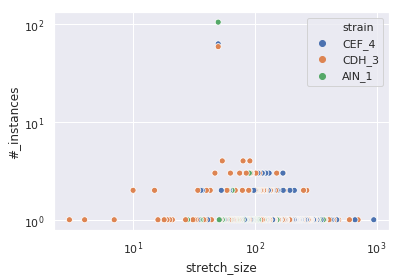

In [25]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.


# Visualization
import seaborn as sns
sns.set() # from https://seaborn.pydata.org/examples/scatterplot_sizes.html; seems to restore style if it gets altered
p = sns.scatterplot(x="stretch_size", y="#_instances", hue="strain",data=stretches_size_freq_df)
# Set the scale of the x-and y-axes
p.set(xscale="log", yscale="log");
#p.get_legend().set_visible(False);

Starting to go torwards the representation seen [here in Figure 1](https://www.researchgate.net/publication/12094921_Computational_comparison_of_two_draft_sequences_of_the_human_genome). For example, you can see the banding caused by using the log scale for 'number of instances' axis. However, as there aren't that many and that wide of a range of stretches of N among the 1011 collection (at least with out what I have seen in development), I don't think this path is going to yield a nice visual for the 1011 *cerevisiae genomes* collection.

### Examining the number and size of stretches of Ns present for the 1011 collection (Different tack)

Because of the extremes of the PacBio and the reference sequence, even if just concern yourself, with 'stetch_size' the data don't visualize well with those from the 1011 collection. That can be summarized best with a plot by running the next cell. (Code reduced to minimum but fleshe out in this section.)



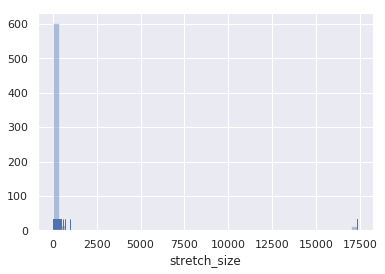

In [26]:
%matplotlib inline 
import seaborn as sns
sns.set()
# collect blocks of Ns in the genomes
import re
from collections import defaultdict
from pyfaidx import Fasta
import pandas as pd
import collections
min_number_Ns_in_row_to_collect = 3
pattern_obj = re.compile("N{{{},}}".format(min_number_Ns_in_row_to_collect), re.I)
matches = []
for g in genomes:
    len_match_dict = defaultdict(int)
    if ".genome.fa" in g:
        strain_id = g.split(".genome.fa")[0]
    else:
        strain_id = g.split(".re.fa")[0][18:]
    records = Fasta(g)
    for record in records:
        for m in pattern_obj.finditer(str(record)):
            matches.append((strain_id,len(m.group())))
matches.append(("SGD_ref",0))
labels = ['strain', 'stretch_size']
stretch_df = pd.DataFrame.from_records(matches, columns=labels)
sns.distplot(stretch_df["stretch_size"], kde=False, rug=True);

See how most stuff is squashed all on low end relative the PacBio sequences at around 17500.

For visualization of the 1011 collection data adequately, probably best to separate out PacBio and SGD references and start treating strains as category and let Seaborn can handle instances itself. So we need a simpler dataframe than one in above section, one for each instance of a stretch of Ns found.

In [27]:
%%time
# collect blocks of Ns in the genomes
import re
from collections import defaultdict
from pyfaidx import Fasta
import pandas as pd
import collections


min_number_Ns_in_row_to_collect = 3
pattern_obj = re.compile("N{{{},}}".format(min_number_Ns_in_row_to_collect), re.I)  # adpated from
# code worked out in `collapse_large_unknown_blocks_in_DNA_sequence.py`, which relied heavily on
# https://stackoverflow.com/a/250306/8508004

matches = []

#genomes = ["N44.genome.fa"]

for g in genomes:
    len_match_dict = defaultdict(int)
    if ".genome.fa" in g:
        strain_id = g.split(".genome.fa")[0]
    else:
        strain_id = g.split(".re.fa")[0][18:]
    records = Fasta(g)
    for record in records:
        for m in pattern_obj.finditer(str(record)):
            matches.append((strain_id,len(m.group())))
            
#before using list of matches to make a dataframe, add
# entry for reference sequence that has no actual instancesto
#collection, add an entry of zero for size of 1 so the
#strain with no stretches will be in final dataframe
matches.append(("SGD_ref",0))

#make a dataframe from the list
labels = ['strain', 'stretch_size']
stretch_df = pd.DataFrame.from_records(matches, columns=labels)

CPU times: user 3.43 s, sys: 62.4 ms, total: 3.5 s
Wall time: 3.85 s


In [28]:
stretch_df

,strain,stretch_size
0,DBVPG6044,17357
1,DBVPG6765,17357
2,CBS432,17357
3,YPS128,17357
4,UFRJ50816,17357
5,S288C,17357
6,SK1,17357
7,UWOPS034614,17357
8,UWOPS919171,17357
9,YPS138,17357


In [ ]:
len(stretch_df)

In [ ]:
stretch_df.to_csv('PB_n_1011_collection_all_stretchesN_df.tsv', sep='\t',index = False)    
stretch_df.to_pickle("PB_n_1011_collection_all_stretchesN_df.pkl")

(If running on that whole set, store those files so you can read them in later, or elsewhere, as needed.)

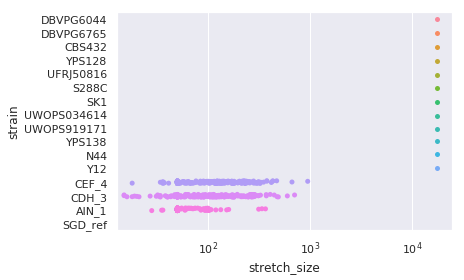

In [29]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.


# Visualization
import seaborn as sns
sns.set()
p = sns.stripplot(x="stretch_size", y="strain", data=stretch_df);
# Set the scale of the x-and y-axes
p.set(xscale="log");
#p.get_legend().set_visible(False);
#p = sns.swarmplot(x="stretch_size", y="strain", data=df);

It is at least showing the rDNA masking in the PacBio data well.

But if you try swarmplot, you'll see it isn't showing the distibution well for those in the 1011 collection as just with these few it is too many, it seems. 

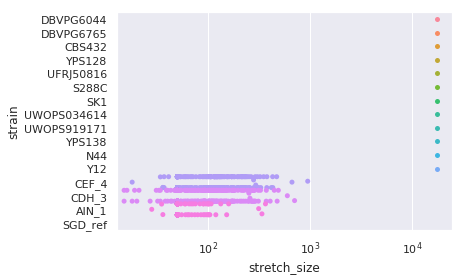

In [30]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.


# Visualization
import seaborn as sns
sns.set()
p = sns.swarmplot(x="stretch_size", y="strain", data=stretch_df);
# Set the scale of the x-and y-axes
p.set(xscale="log");
#p.get_legend().set_visible(False);
#p = sns.swarmplot(x="stretch_size", y="strain", data=df);

Can see that by limiting to the two from the 1011 collection.

In [31]:
stretch_df = stretch_df.drop(stretch_df[(stretch_df["stretch_size"] > 17000) | (stretch_df["stretch_size"] == 0)].index)

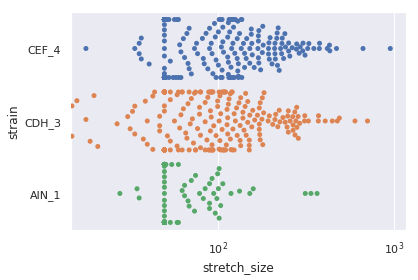

In [32]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.


# Visualization
import seaborn as sns
sns.set()
p = sns.swarmplot(x="stretch_size", y="strain", data=stretch_df);
# Set the scale of the x-and y-axes
p.set(xscale="log");
#p.get_legend().set_visible(False);
#p = sns.swarmplot(x="stretch_size", y="strain", data=df);

Many more at 50 than can be handled so get artificats like discussed [here](https://stackoverflow.com/questions/50817607/variable-spacing-of-discrete-categories-in-seaborn-swarmplot). And it can be made better by increasing the height, although still seems to happen no matter how tall it is finally made as even the use of `plt.figure(figsize=(8,13))` causes curling.

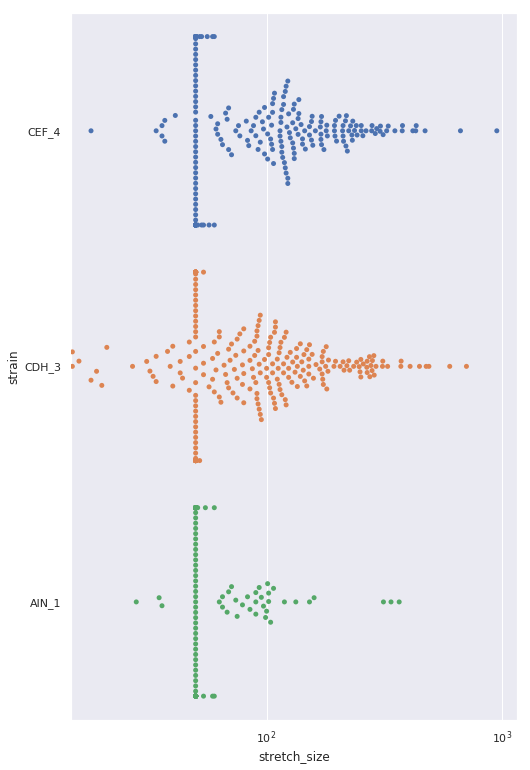

In [34]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,13))

# Visualization
import seaborn as sns
sns.set()
p = sns.swarmplot(x="stretch_size", y="strain", data=stretch_df);
# Set the scale of the x-and y-axes
p.set(xscale="log");
#p.get_legend().set_visible(False);
#p = sns.swarmplot(x="stretch_size", y="strain", data=df);


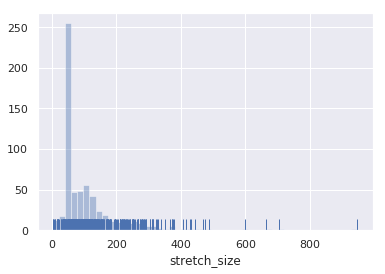

In [35]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.

# Visualization
import seaborn as sns
sns.set()
stretch_df = stretch_df.drop(stretch_df[(stretch_df["stretch_size"] > 17000) | (stretch_df["stretch_size"] == 0)].index)
sns.distplot(stretch_df["stretch_size"], kde=False, rug=True);

Nicer, but what pertains to which strain?

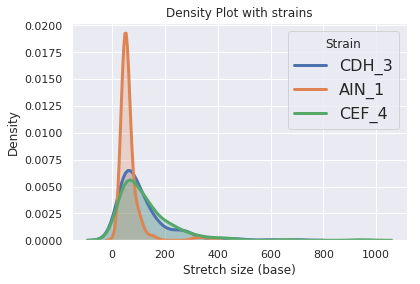

In [36]:
%matplotlib inline 
# above line works for JupyterLab which I was developing in. Try  `%matplotlib notebook` for when in classic.

# Visualization - based on https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Limit to subset, if not set already
stretch_df = stretch_df.drop(stretch_df[(stretch_df["stretch_size"] > 17000) | (stretch_df["stretch_size"] == 0)].index)

# List of strains to plot
strains = set(stretch_df["strain"].tolist())

# Iterate through the strains
for strain in strains:
    # Subset to the strain
    subset = stretch_df[stretch_df['strain'] == strain]
    
    # Draw the density plot
    sns.distplot(subset['stretch_size'], hist = False, kde = True,# rug = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 #rug_kws={'color': 'black'},
                 label = strain)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Strain')
plt.title('Density Plot with strains')
plt.xlabel('Stretch size (base)')
plt.ylabel('Density');

As discussed at the end of [here](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0), uncomment the two portions dealing with `rug` to see the actual data points. I don't leave them on here bey default becuase many and cannot see which belong to which strain.

While this is nice, it will be difficult once I add a lot more in order to do anything with the 1011 collection or even a subset. Alternatives? [Raincloud plots](https://nbviewer.jupyter.org/github/pog87/PtitPrince/blob/master/RainCloud_Plot.ipynb) look promising for this situation.

In [37]:
!pip install ptitprince

    100% |████████████████████████████████| 61kB 5.5MB/s 
    100% |████████████████████████████████| 2.1MB 6.5MB/s 
  Running setup.py bdist_wheel for ptitprince ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/9b/83/2c/c95e8acb38c4cafe521068ed756b2852b15ec1dcb25dbcf924
Successfully built ptitprince


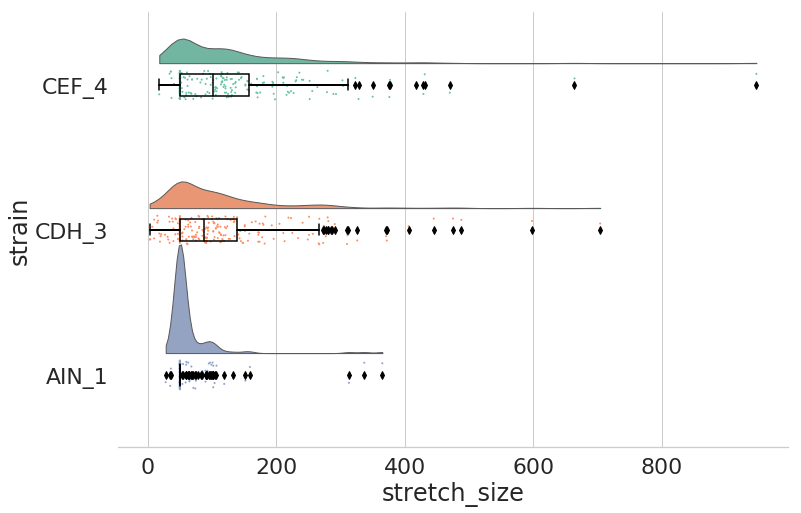

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)

#Limit to subset, if not set already
stretch_df = stretch_df.drop(stretch_df[(stretch_df["stretch_size"] > 17000) | (stretch_df["stretch_size"] == 0)].index)

#Want an image file of the figure saved?
savefigs = True
savefig_fn = 'n_stetch_distrbution_raincloud_tiny_subset.png'

f, ax = plt.subplots(figsize=(12, 8))
import ptitprince as pt
ort = "h"
ax=pt.half_violinplot(data=stretch_df, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area", width=1.5, inner=None,orient=ort,x='stretch_size', y="strain")
ax=sns.stripplot(data=stretch_df, palette="Set2", edgecolor="white",size=2,orient=ort,x='stretch_size',y="strain",jitter=1,zorder=0)
ax=sns.boxplot(data=stretch_df, color="black",orient=ort,width=.15,x='stretch_size',y="strain",zorder=10,showcaps=True,boxprops={'facecolor':'none', "zorder":10},showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1)

# Finalize the figure
#ax.set(xlim=(0,1000)) #This can be used to 'zoom in', if you accept, i.e., note in the legend, that anything with a 
# line continuing off means there are more points off the scale. Could  indicating symbols be added like I did in 
# plot expression plots?
#ax.set(ylim=(3.5, -.7)) # this can be used to actually plot fractions of them 'kind of'. `ax.set(ylim=(3.5, -.7))` results 
# in plots of four, although they are spaced out.
sns.despine(left=True)

if savefigs:
    f.savefig(savefig_fn, bbox_inches='tight')

(See the 'small' or 'all' version of this notebook for some notes on settings within code. Notes are within the code iteself as well as in markdown cell below the plot.)

After getting that raincloud plot to work, I tried with the group that included the PacBio set and SGD_ref, but the compression of the vast distances causes same issues as seen elsewhere above. For the record, here is an image of it:

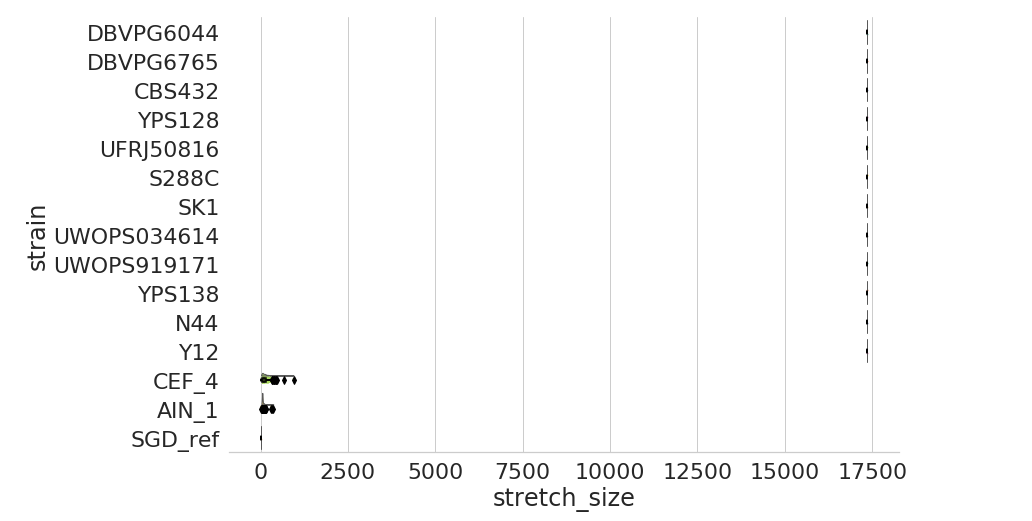

In [55]:
#using code to show b/c encodes as Base64 code and saves with notebook
from IPython.display import Image
Image("raincloud_suffers_same_fate.png")

----

In [ ]:
import time

def executeSomething():
    #code here
    print ('.')
    time.sleep(480) #60 seconds times 8 minutes

while True:
    executeSomething()

.
.
.
.
.
.
.
